<a href="https://colab.research.google.com/github/shikarukitake/Advanced-Machine-Learning/blob/master/competitive-data-science/week1/PandasBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Version 1.0.1

In [1]:
! wget https://raw.githubusercontent.com/hse-aml/competitive-data-science/master/Programming%20assignment%2C%20week%201%3A%20Pandas%20basics/grader.py -O grader.py

--2020-05-08 16:39:52--  https://raw.githubusercontent.com/hse-aml/competitive-data-science/master/Programming%20assignment%2C%20week%201%3A%20Pandas%20basics/grader.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3144 (3.1K) [text/plain]
Saving to: ‘grader.py’

grader.py           100%[===================>]   3.07K  --.-KB/s    in 0s      

2020-05-08 16:39:52 (33.5 MB/s) - ‘grader.py’ saved [3144/3144]



# Pandas basics 

Hi! In this programming assignment you need to refresh your `pandas` knowledge. You will need to do several [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)s and [`join`]()`s to solve the task. 

In [0]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline 

from grader import Grader

In [3]:
! git clone https://github.com/shikarukitake/Advanced-Machine-Learning.git

Cloning into 'Advanced-Machine-Learning'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 32 (delta 3), reused 12 (delta 1), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [0]:
DATA_FOLDER = '/content/Advanced-Machine-Learning/competitive-data-science/readonly/final_project_data/'

transactions    = pd.read_csv(os.path.join(DATA_FOLDER, 'sales_train.csv.gz'))
items           = pd.read_csv(os.path.join(DATA_FOLDER, 'items.csv'))
item_categories = pd.read_csv(os.path.join(DATA_FOLDER, 'item_categories.csv'))
shops           = pd.read_csv(os.path.join(DATA_FOLDER, 'shops.csv'))

The dataset we are going to use is taken from the competition, that serves as the final project for this course. You can find complete data description at the [competition web page](https://www.kaggle.com/c/competitive-data-science-final-project/data). To join the competition use [this link](https://www.kaggle.com/t/1ea93815dca248e99221df42ebde3540).

## Grading

We will create a grader instace below and use it to collect your answers. When function `submit_tag` is called, grader will store your answer *locally*. The answers will *not* be submited to the platform immediately so you can call `submit_tag` function as many times as you need. 

When you are ready to push your answers to the platform you should fill your credentials and run `submit` function in the <a href="#Authorization-&-Submission">last paragraph</a>  of the assignment.

In [0]:
grader = Grader()

# Task

Let's start with a simple task. 

<ol start="0">
  <li><b>Print the shape of the loaded dataframes and use [`df.head`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html) function to print several rows. Examine the features you are given.</b></li>
</ol>

In [6]:
print(transactions.shape)
transactions.head()

(2935849, 6)


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [7]:
print(items.shape)
items.head()

(22170, 3)


,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [8]:
print(item_categories.shape)
item_categories.head()

(84, 2)


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [9]:
print(shops.shape)
shops.head()

(60, 2)


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


Now use your `pandas` skills to get answers for the following questions. 
The first question is:

1. ** What was the maximum total revenue among all the shops in September, 2014?** 


* Hereinafter *revenue* refers to total sales minus value of goods returned.

*Hints:*

* Sometimes items are returned, find such examples in the dataset. 
* It is handy to split `date` field into [`day`, `month`, `year`] components and use `df.year == 14` and `df.month == 9` in order to select target subset of dates.
* You may work with `date` feature as with srings, or you may first convert it to `pd.datetime` type with `pd.to_datetime` function, but do not forget to set correct `format` argument.

In [10]:
# adding day, month and year column
transactions[['day', 'month', 'year']] = transactions.date.str.split('.', expand=True)
transactions.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013


In [0]:
# adding total_price (item_price * item_cnt_day) column
transactions['total_price'] = transactions.item_price * transactions.item_cnt_day

In [12]:
condition = (transactions.month == '09') & (transactions.year == '2014')
# group by day and find the sum of item's total price
transactions[condition].groupby('shop_id').total_price.sum()

shop_id
2     1.473540e+06
3     1.228425e+06
4     1.211556e+06
5     1.350828e+06
6     3.480397e+06
7     2.127491e+06
10    7.744040e+05
12    6.378335e+06
14    1.499621e+06
15    2.383940e+06
16    1.919162e+06
17    1.385955e+06
18    2.132611e+06
19    2.050485e+06
21    2.023241e+06
22    2.175790e+06
24    1.956968e+06
25    6.783338e+06
26    2.504839e+06
27    4.899292e+06
28    4.985847e+06
29    2.071339e+06
30    1.902539e+06
31    7.982852e+06
33    5.391150e+05
34    4.829700e+05
35    2.323137e+06
37    1.401708e+06
38    2.472334e+06
39    7.788630e+05
40    3.538670e+05
41    1.133782e+06
42    4.753366e+06
43    2.793483e+06
44    1.049887e+06
45    1.199660e+06
46    2.703858e+06
47    2.487424e+06
48    1.463744e+06
49    8.754520e+05
50    1.872948e+06
51    7.650010e+05
52    1.520397e+06
53    1.914577e+06
54    4.839335e+06
55    1.794684e+06
56    1.780582e+06
57    3.223198e+06
58    1.949760e+06
59    1.567666e+06
Name: total_price, dtype: float64

In [13]:
max_revenue = transactions[condition].groupby('shop_id').total_price.sum().max()
grader.submit_tag('max_revenue', max_revenue)

Current answer for task max_revenue is: 7982852.199999956


Great! Let's move on and answer another question:

<ol start="2">
  <li><b>What item category generated the highest revenue in summer 2014?</b></li>
</ol>

* Submit `id` of the category found.
    
* Here we call "summer" the period from June to August.

*Hints:*

* Note, that for an object `x` of type `pd.Series`: `x.argmax()` returns **index** of the maximum element. `pd.Series` can have non-trivial index (not `[1, 2, 3, ... ]`).

In [0]:
transactions_items = pd.merge(transactions, items, on='item_id')

In [18]:
transactions_items

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year,total_price,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,02,01,2013,999.0,ЯВЛЕНИЕ 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,23,01,2013,999.0,ЯВЛЕНИЕ 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,20,01,2013,999.0,ЯВЛЕНИЕ 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,02,01,2013,999.0,ЯВЛЕНИЕ 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,03,01,2013,999.0,ЯВЛЕНИЕ 2012 (BD),37
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,17,10,2015,249.0,"АХ, ВОДЕВИЛЬ, ВОДЕВИЛЬ (rem)",40
2935845,01.10.2015,33,25,7903,12198.0,1.0,01,10,2015,12198.0,XBOX 360 S 250GB CONSOLE/KINECT BUNDLE KUNG FU...,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,29,10,2015,2890.0,WARHAMMER ACCESSORIES: Khorne Dice арт. 65-13,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,22,10,2015,2100.0,WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...,64


In [20]:
condition = (transactions_items.month.isin(['06', '07', '08'])) & (transactions_items.year == '2014')

groupby_summed = transactions_items[condition].groupby('item_category_id').total_price.sum()
category_id_with_max_revenue = groupby_summed.index[groupby_summed.argmax()]
grader.submit_tag('category_id_with_max_revenue', category_id_with_max_revenue)

Current answer for task category_id_with_max_revenue is: 20


<ol start="3">
  <li><b>How many items are there, such that their price stays constant (to the best of our knowledge) during the whole period of time?</b></li>
</ol>

* Let's assume, that the items are returned for the same price as they had been sold.

In [0]:
unique = transactions.groupby(['item_id']).item_price.nunique()

In [22]:
# YOUR CODE GOES HERE

num_items_constant_price = unique[unique.values == 1].count()
grader.submit_tag('num_items_constant_price', num_items_constant_price)

Current answer for task num_items_constant_price is: 5926


Remember, the data can sometimes be noisy.

<ol start="4">
  <li><b>What was the variance of the number of sold items per day sequence for the shop with `shop_id = 25` in December, 2014?</b></li>
</ol>

* Fill `total_num_items_sold` and `days` arrays, and plot the sequence with the code below.
* Then compute variance. Remember, there can be differences in how you normalize variance (biased or unbiased estimate, see [link](https://math.stackexchange.com/questions/496627/the-difference-between-unbiased-biased-estimator-variance)). Compute ***unbiased*** estimate (use the right value for `ddof` argument in `pd.var` or `np.var`).

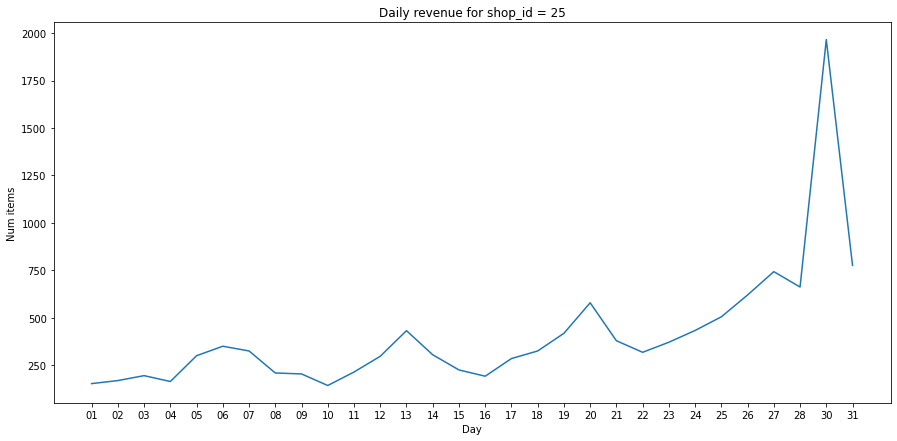

Current answer for task total_num_items_sold_var is: 117167.70229885059


In [23]:
shop_id = 25

condition = (transactions.month == '12') & (transactions.year == '2014') & (transactions.shop_id == shop_id)
groupeb_by_day = transactions[condition].groupby(['day']).item_cnt_day.sum()
total_num_items_sold = groupeb_by_day.values
days = groupeb_by_day.index

# Plot it
plt.figure(figsize=(15,7))
plt.plot(days, total_num_items_sold)
plt.ylabel('Num items')
plt.xlabel('Day')
plt.title("Daily revenue for shop_id = 25")
plt.show()

total_num_items_sold_var = groupeb_by_day.values.var(ddof=1)
grader.submit_tag('total_num_items_sold_var', total_num_items_sold_var)

## Authorization & Submission
To submit assignment to Cousera platform, please, enter your e-mail and token into the variables below. You can generate token on the programming assignment page. *Note:* Token expires 30 minutes after generation.

In [24]:
STUDENT_EMAIL = 'DELETED'
STUDENT_TOKEN = 'DELETED'
grader.status()

You want to submit these numbers:
Task max_revenue: 7982852.199999956
Task category_id_with_max_revenue: 20
Task num_items_constant_price: 5926
Task total_num_items_sold_var: 117167.70229885059


In [25]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)

Submitted to Coursera platform. See results on assignment page!


Well done! :)